In [110]:
import pandas as pd
import numpy as np 
import seaborn as sns 
sns.set(style='white', palette='muted', color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px 

In [111]:
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor 
from sklearn.linear_model import LogisticRegression, LinearRegression 
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler 
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [112]:
data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-4-heart.csv')
# data

In [113]:
# data.info()
data.duplicated().sum()
data.drop_duplicates(subset=None, keep='first', ignore_index=False, inplace=True)
data.duplicated().sum()

0

In [114]:
mis_col = data.isnull().sum() * 100 /len(data)
# mis_col.sort_values(ascending=False)

In [115]:
# data.describe()

c:\Users\amunv\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Chol Outliers'}, xlabel='chol'>

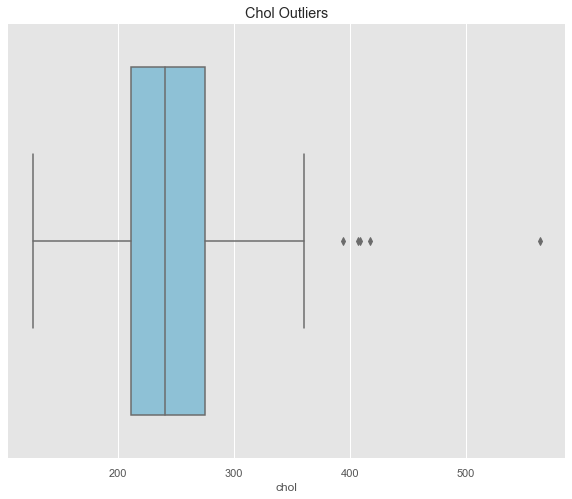

In [116]:
f,ax = plt.subplots(figsize=(10,8))
ax.set_title('Chol Outliers')

sns.boxplot(data.chol, color='c', ax=ax)

In [117]:
data.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.432080
thalach     0.419955
slope       0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64

<AxesSubplot:title={'center':'Correlation Table'}>

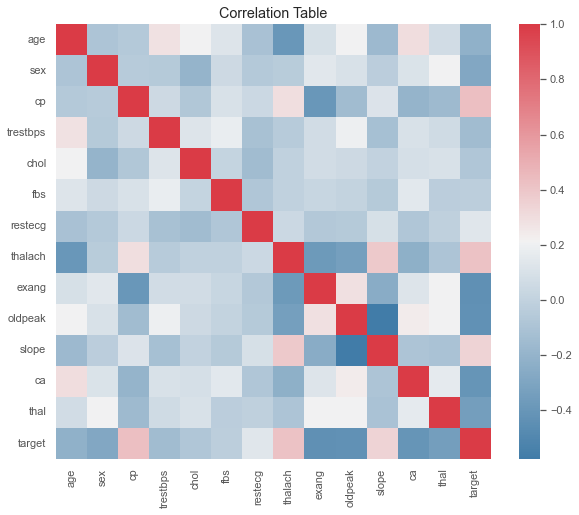

In [118]:
f,ax = plt.subplots(figsize=(10,8))
ax.set_title('Correlation Table')

data_corr = data.corr()
sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool_), cmap=sns.diverging_palette(240,10, as_cmap=True),
square=True, ax=ax)

In [119]:
y = data.target
x = data.drop(columns=['target'], axis=1)


In [120]:
num_val = ['age','trestbps','chol','thalach','oldpeak' ]
cat_val = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']

sex_val = data.sex

In [121]:
# transfo = [('num', StandardScaler(), num_val),('cat', OrdinalEncoder(), cat_val)]
# transform = ColumnTransformer(transformers=transfo)

In [122]:
t = [(StandardScaler(), num_val), (OrdinalEncoder(), cat_val)]
transform = ColumnTransformer(transformers=t)

In [123]:
ord_sex = data.sex 
ord_sex

0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 302, dtype: int64

In [124]:
data.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
